In [59]:
#import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import dist
import seaborn as sns

def pixel_to_image(pixel_value):

  test_in = pd.read_csv("/content/sample_data/data/test_in.csv",index_col=None)

  im = test_in.iloc[0].values.reshape((16,16))
  plt.imshow(im)

def no_index_read():
    def func(input:str):
        return pd.read_csv(input,index_col=None)
    return func
read_csv = no_index_read()
test_in = read_csv("/content/sample_data/data/test_in.csv")
test_out = read_csv("/content/sample_data/data/test_out.csv")
train_in = read_csv("/content/sample_data/data/train_in.csv")
train_out = read_csv("/content/sample_data/data/train_out.csv")


In [69]:
def make_one_hot(y, output_classes):
  one_hot = np.zeros((y.shape[0], output_classes))
  one_hot[np.arange(y.shape[0]), y] = 1

  return one_hot

def scale_values(data):
  scaler = MinMaxScaler()
  X = scaler.fit_transform(data)
  return X


Train = train_in.apply(lambda row: np.append(row.values, 1), axis=1)
Train = pd.DataFrame(Train.tolist())
#X = scale_values(Train.values)
X = Train.values
input_features_size = (Train.values[0].shape)[0]
targets = train_out.values.flatten()

digits = sorted(list(set(targets)))


no_classes = len(digits)
Y_true = make_one_hot(targets, no_classes)


In [70]:

W = np.random.randn(input_features_size, no_classes) * 0.01
losses = []
learning_rate = 0.1
max_epochs = 1000
total_error = 0


#X = scale_values(Train.values)

In [77]:
from sklearn.preprocessing import MinMaxScaler

def calculate_error(X, W, Y_true):
  Y_pred_index = np.argmax(np.dot(X, W), axis=1)
  Y_pred = make_one_hot(Y_pred_index, Y_true.shape[1])
  Error = Y_pred - Y_true

  return Error
def compute_gradient(X, Error):
  gradient_W = 2* np.dot(X.T , Error)
  return gradient_W

def update_weights(W, gradient_W, learning_rate):
  return W - learning_rate * gradient_W





def train(X,W,Y_true):
  avg_acc_loss_list = []
  for epoch in range(max_epochs):
    total_error = 0
    Error = calculate_error(X, W, Y_true)

    gradient_W = compute_gradient(X, Error)

    W = update_weights(W, gradient_W, learning_rate)
    Y_pred = np.dot(X, W)  # Predict outputs
    square_error = (Error) ** 2

    loss = np.mean(square_error)# Compute mean loss
    accuracy = np.mean(np.argmax(Y_true, axis=1) == np.argmax(Y_pred, axis=1))
    avg_acc_loss = loss/accuracy
    avg_acc_loss_list.append(avg_acc_loss)
    losses.append(loss)

          # Print progress every 10 epochs
    # if epoch % 10 == 0:
    #     print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss:.4f}")
    # # if loss == 0:
    #   print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    #   break

  return W, losses, avg_acc_loss_list

W, losses, avg_acc_loss_list = train(X,W,Y_true)


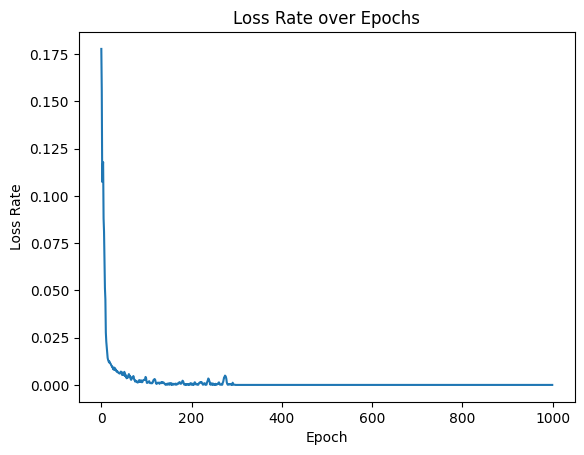

In [72]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss Rate')
plt.title('Loss Rate over Epochs')
plt.show()

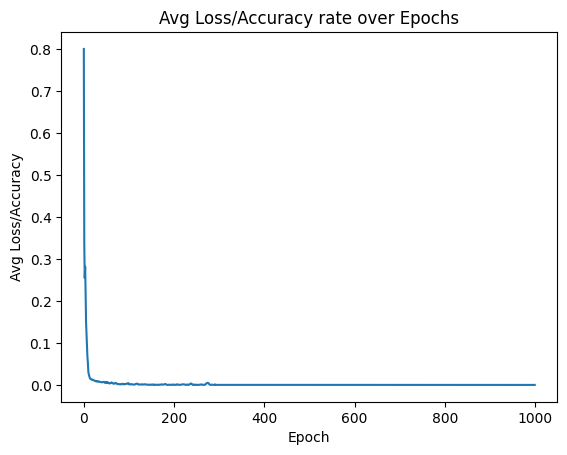

In [73]:
plt.plot(avg_acc_loss_list)
plt.xlabel('Epoch')
plt.ylabel('Avg Loss/Accuracy')
plt.title('Avg Loss/Accuracy rate over Epochs')
plt.show()

In [74]:
Test = test_in.apply(lambda row: np.append(row.values, 1), axis=1)
Test = pd.DataFrame(Test.tolist())
X_test = Test.values
#Y_true = make_one_hot(test_out.values.flatten(), no_classes)
Y_test = test_out.values.flatten()
print(X_test.shape)
print(Y_test.shape)

(999, 257)
(999,)


In [78]:
def predict_output(Test, test_targets, model_weights):

    correct_predictions = 0
    predictions = []
    for i in range(Test.shape[0]):
      dot_product = np.dot(Test[i], model_weights)
      y_pred = np.argmax(dot_product)
      predictions.append(y_pred)
      #print(f"Target value is {test_targets[i]} and Predicted value is {y_pred}")

      if y_pred == test_targets[i]:
        correct_predictions+=1
    accuracy = (correct_predictions / Test.shape[0])*100
    return accuracy, predictions

accuracy, predictions = predict_output(X_test, Y_test, W)

In [76]:
accuracy

86.88688688688688